In [3]:
from unsupervised.unsupervised.SVD import SVD
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

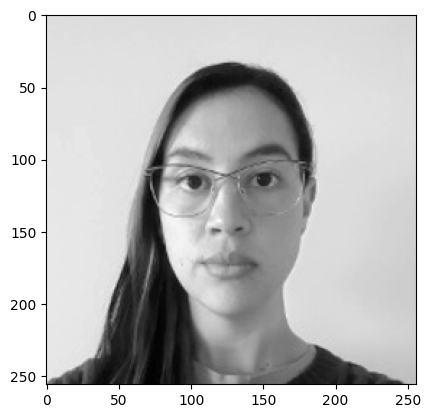

In [53]:
# Open the image
my_image = Image.open("cohort_face_photos/Imagen23.jpg")
# Convert to grayscale rezise and get array
my_image = my_image.convert("L")
my_image = my_image.resize((256, 256))
my_image_array = np.array(my_image)

# Plot the image
plt.imshow(my_image, cmap="gray")
plt.show()

In [60]:
def get_new_face_image(n_singular_values):
    '''receives the number of singular values and plots the new image, 
    histogram comparison and the difference between new image and original'''
        
    svd = SVD(n_singular_values=n_singular_values)
    comps = svd.fit_transform(my_image_array)
    
    diference_face = comps.flatten() - my_image_array.flatten()
    diference_face_image = diference_face.reshape((256, 256)).astype(np.uint8)
    diference_face_image_scalated = diference_face_image/(max(diference_face)-min(diference_face))
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5))
    fig.suptitle(f'{n_singular_values} Singular Values')
    ax1.set_title('New image')
    ax2.set_title('Histogram comparison')
    ax1.imshow(comps, cmap="gray")
    ax2.hist([comps.flatten(),my_image_array.flatten()],label=['new_image','original_image'])
    ax2.legend()
    
    fig = plt.figure(figsize=(5,6))
    plt.title('Difference between original and new image')
    plt.imshow(diference_face_image_scalated,cmap = 'coolwarm',vmin=0,vmax=1)
    plt.colorbar(orientation = 'horizontal')
    plt.show()
    

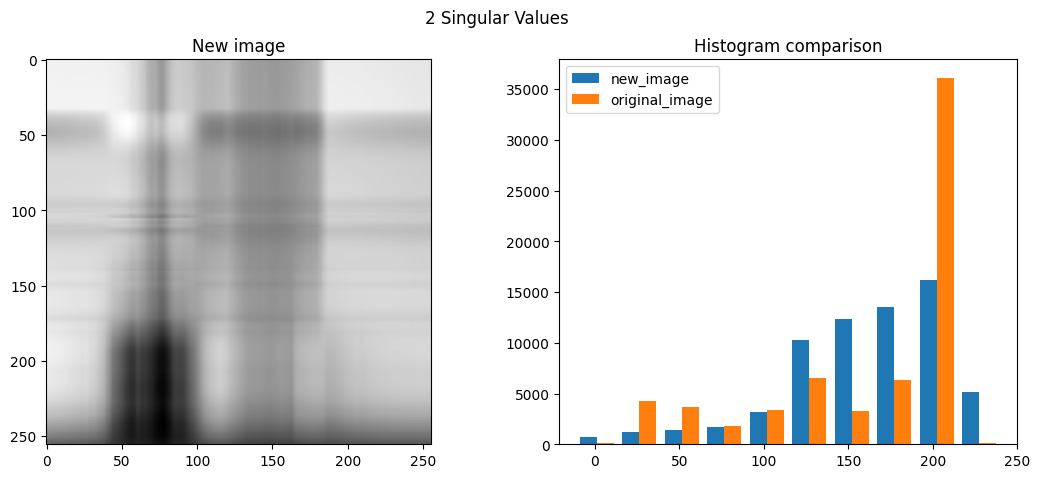

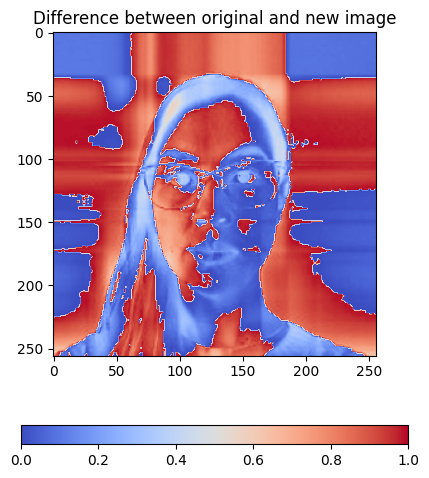

In [61]:
get_new_face_image(2)

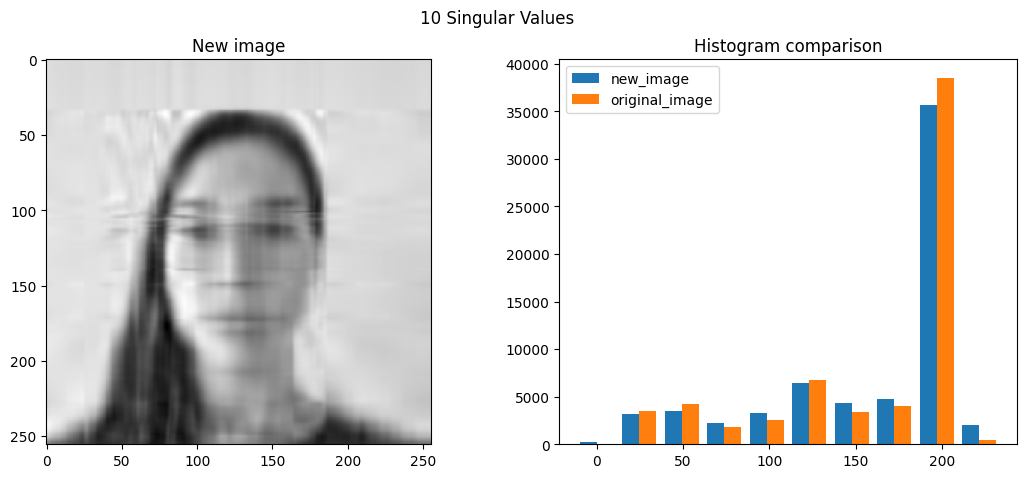

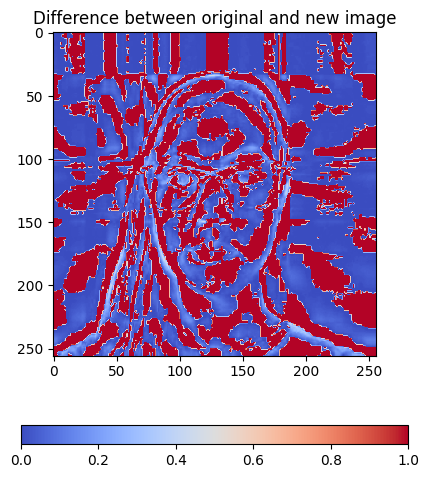

In [62]:
get_new_face_image(10)

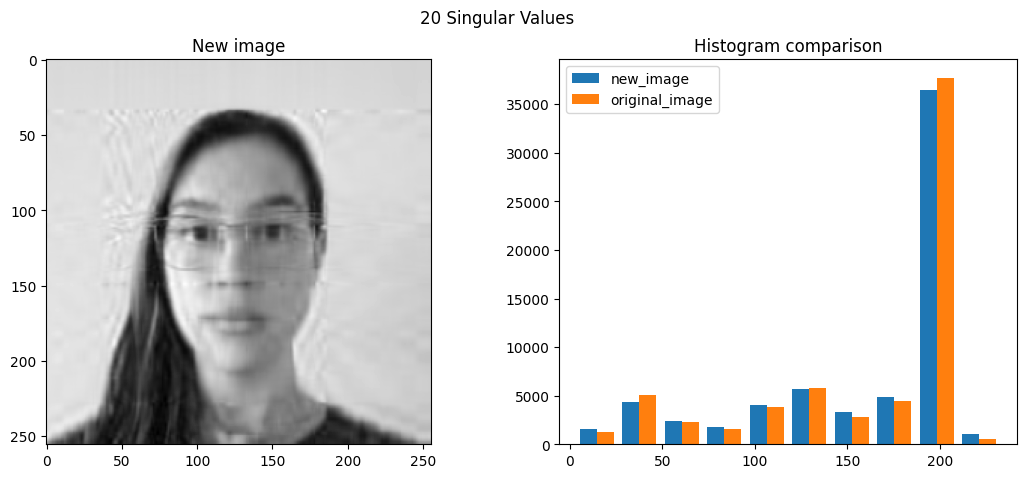

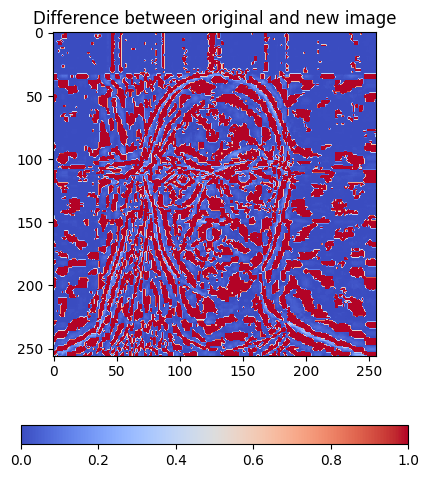

In [63]:
get_new_face_image(20)

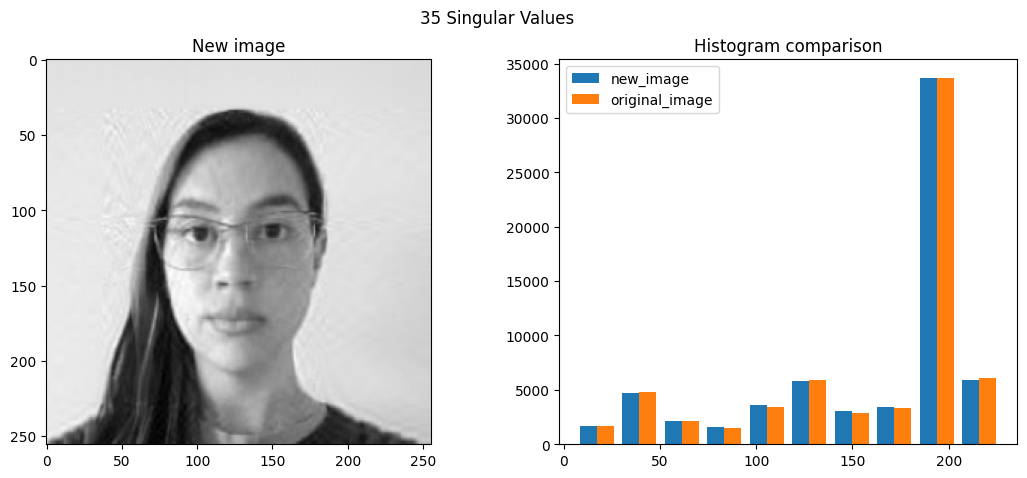

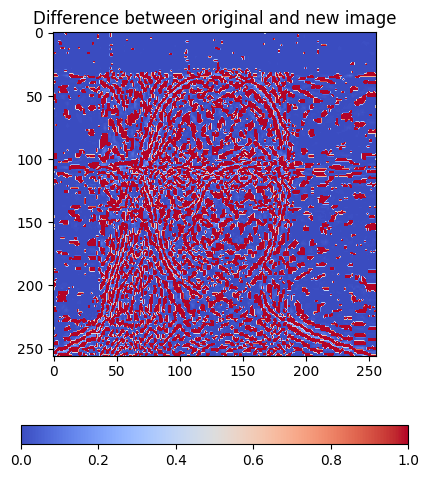

In [64]:
get_new_face_image(35)

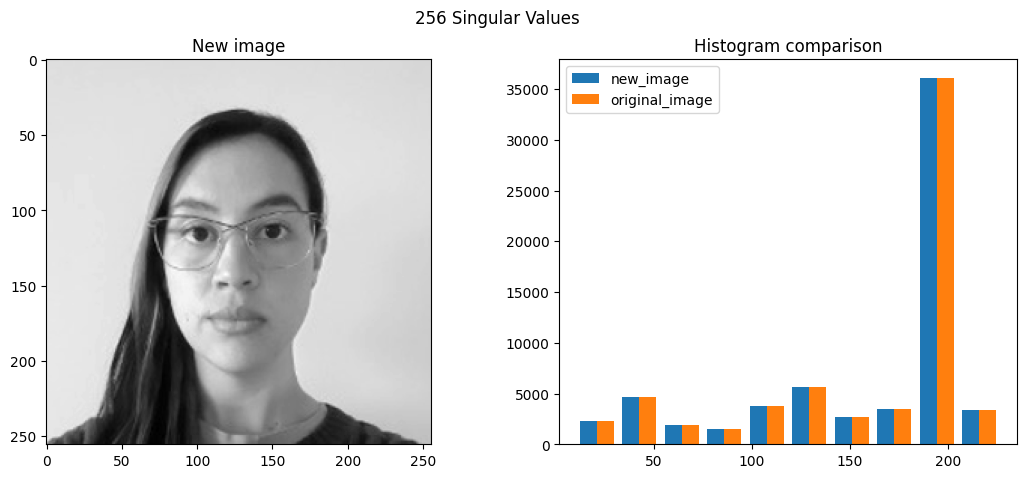

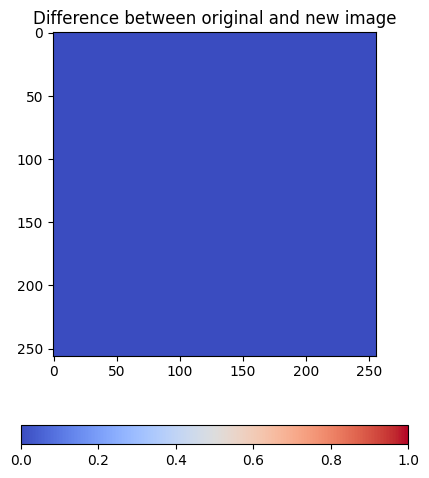

In [65]:
get_new_face_image(256)

The modified matrix was calculated keeping 2,10,20,35 and 256 singular values, the latter being the maximum value allowed given the dimensions of the image.

From the graphs it can be seen that with 20 singular values it is possible to identify the image and that with 35 singular values the histograms of the values are almost identical and the image can be seen almost the same as the original.

However, it is striking in the difference graph that even with 35 singular values, many pixels are still quite different from those of the original image, which demonstrates the ability of this algorithm to capture the most important information and reflect it in the new image.